#Project 2 
###Group members: Gege Li, Zhihong Zhang, Zhijing Zhang

## Introduction
In project 2, we are going to use clustering algorithms(Hierarchical and K-means) to create groupings of similar data observations within the provided data set. After completing the necessary EDA and data prep work, we will construct the SVM models to predict the most likely
categorization of any previously unseen data items.

Steps:
- Load data and exploratory data analysis;
- Data preparation;
- Clustering modeling(Hierarchical and K-means);
- Compare clustering ourput and actual labels;
- SVM modeling, including feature selections and use different explanatory features and choose better kernel;
- Select model and compare with the actual labels;
- Get our conclusions.


## Pre-Clustering Exploratory Data Analysis & Pre-Clustering Data Preparation

In [63]:
#prepared library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# check and read the dataset from github
file = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/Project2_Data.csv')
file.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


*The dataset consists of __10 numerical__ and __7 categorical__ attributes.*
The 'Revenue' attribute can be used as the class label.


- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

-  The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

After we got the data, we need to check the data type to see whether it fits the description of the data. Through info, we now know there are four categorical ordinal variables that are recognized as numeric value in python. 

In [65]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Also, through info, there is no missing value in this dataset. The null-value check pass as well.

In [66]:
file.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [67]:
#value counts
file.SpecialDay.value_counts()
file.OperatingSystems.value_counts()
file.Browser.value_counts()
file.Region.value_counts()
#file.VisitorType.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Based on the data info, let's check the attributes. 

We find that "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related", "Product Related Duration",  "Bounce Rate", "Exit Rate", "Page Value" and 'SpecialDay' are numerical attributes. 'Month', 'Operatingsystems', 'Browser', 'Region', 'TrafficTpye', 'VisitorTpye' and 'Weedend' are categorical attributes.

For the categorical data, we plan to make some of them to be numeric to make plots to see how it distributes. 

So we will change the data type in order to do further EDA. 

In [68]:
df = file.copy()

In [69]:
#change month
df.Month.replace({'Jan':'1',
        'Feb':'2',
        'Mar':'3',
        'Apr':'4',
        'May':'5',
        'June':'6',
        'Jul':'7',
        'Aug':'8',
        'Sep':'9',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'}, inplace = True)

#change weekend
df.Weekend.replace({True: '0',
           False:'1'},inplace = True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,New_Visitor,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,Returning_Visitor,1
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,New_Visitor,1
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,Returning_Visitor,1
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,Returning_Visitor,1


In [70]:
#change data type

convert_dict = {'Month': int, 
                'Weekend': int,               
               } 
  
df = df.astype(convert_dict) 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Now we have the data type changed.

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


We can have a overview of all the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84c5683dd8>,
      dtype=object)

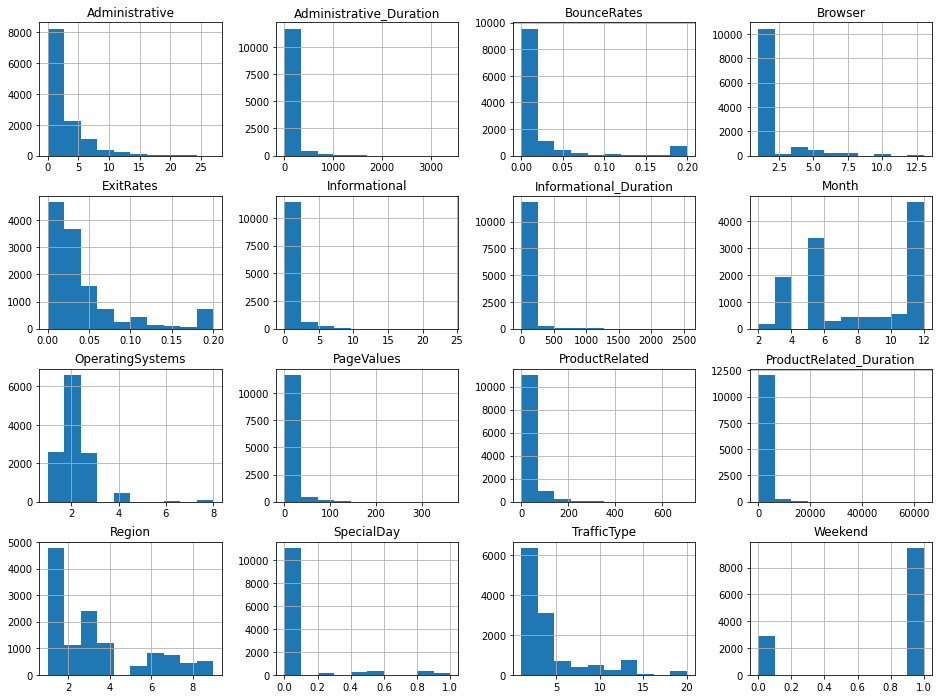

In [73]:
#show the overall histogram
df.hist(xlabelsize=10,ylabelsize=10,figsize=(16,12))

Based on this histogram, we can tell some of the graphs have a quite distinct distribution. Firstly, we want to have variables to have a more diverse distribution for feature selection. Based on these needs, we would like to choose the data which does have some more variance. 

Some possible good attributes are: Administrative, BounceRates, Browser,  Region, Exit Rate,  Traffic Type,
Month, weekend. Especially in month attribute,  December has a very high value (it may be contributed to the Christmas Season).

Some possible fine attributes are: Administritive_Duration, SpecialDay.

There are only visitor Type that we didn't do EDA. Let's show a pie plot of Visitor Type.

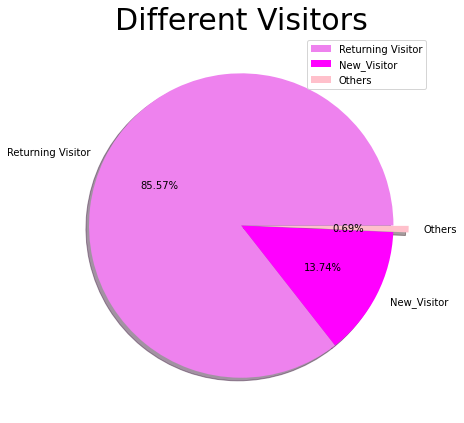

In [74]:
# plotting a pie chart for VisitorType
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

From this pie plot we can find that most visitors are retruning visitor(86.75%). 13.74% are new vistiors and 0.69% are others.

Then we can show the correlation among these features. (Here are some categorical attributes in heatmap but we will ignore it.)

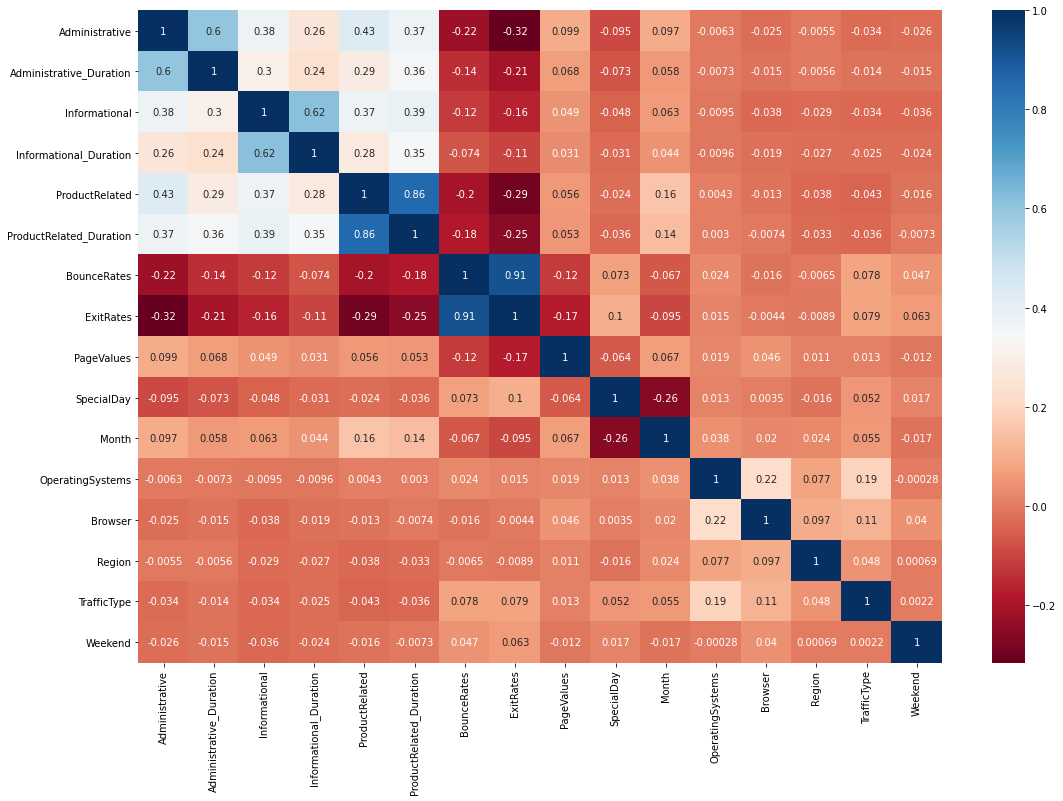

In [75]:
#correlation heatmap 
plt.figure(figsize=(18,12))
ax = sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

Based on the heatmap, we have these findings:

- Administrative has a strong positive correlation with Administrative  duration. Also, these two terms have some correlation with the Informational, informational_Duration. These two terms have a negative correlation with Product related and ProductRelated_Duration 

- Product related is closely correlated with ProductRelated_Duration. These two terms have some negative correlation with the Exit Rate and Page values.


- Bounce Rate is correlated with the Exit Rate.


- OperatingSystem has some correlation with Browser and Traffic Type.

- Special Day has some negative correlation with months.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [77]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,New_Visitor,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,Returning_Visitor,1
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,New_Visitor,1
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,Returning_Visitor,1
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,Returning_Visitor,1


When we check data again, we know this Visitor Type may cause trouble later since it is still categorical.

For this categorical data, since it does not require order, we can either use dummy or one hot encoder to change the categorical data into numeric data. In our case, although one hot encoder will add our dimensionality, it is suitable to use in this data set since the visitor attribute has only three different values. 

In [78]:
X = df.iloc[:,-2]
X

0              New_Visitor
1        Returning_Visitor
2              New_Visitor
3        Returning_Visitor
4        Returning_Visitor
               ...        
12325    Returning_Visitor
12326    Returning_Visitor
12327    Returning_Visitor
12328    Returning_Visitor
12329    Returning_Visitor
Name: VisitorType, Length: 12330, dtype: object

In [79]:
#  labelencoder
from sklearn import preprocessing

df_le = pd.DataFrame(data = df.VisitorType)
df_le

,VisitorType
0,New_Visitor
1,Returning_Visitor
2,New_Visitor
3,Returning_Visitor
4,Returning_Visitor
...,...
12325,Returning_Visitor
12326,Returning_Visitor
12327,Returning_Visitor
12328,Returning_Visitor


In [80]:
# creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another column
df_le['labelencoder'] = labelencoder.fit_transform(df_le['VisitorType'])
df_le.labelencoder.value_counts()

2    10551
0     1694
1       85
Name: labelencoder, dtype: int64

Based on previous diagram, we knew 2 is assigned to returning visitor, 0 is assigned to new customer, and 1 is for otthers. 

In [81]:
# one-hot
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_le[['VisitorType']]).toarray())
enc_df

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
12325,0.0,0.0,1.0
12326,0.0,0.0,1.0
12327,0.0,0.0,1.0
12328,0.0,0.0,1.0


In [82]:
enc_df.rename(columns={0: 'Visitor_0', 1: 'Visitor_1',2: 'Visitor_2'},inplace=True)

In order to avoid the error caused by binary indices(such as 0), we add prefix for it.  

In [83]:
df.drop(columns = 'VisitorType',inplace=True)
new = pd.concat([df, enc_df],axis=1)
new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0


After these preclustering preparation, we can now build our clustering models.

##  Cluster Modeling & Post-Clustering Exploratory Data Analysis 

Firstly, we start with  hierarchical clustering. We also plot some related plots.

### hierarchical clustering

In [84]:
from sklearn import preprocessing

X_std = preprocessing.StandardScaler().fit_transform(new)

#X_std = df[['Administrative','Administrative_Duration','BounceRates','ExitRates','Region','OperatingSystems','Browser','TrafficType','Month','Weekend','SpecialDay']]
#km = KMeans(2, random_state=42)
#km.fit(X_std)

#X_std.head()

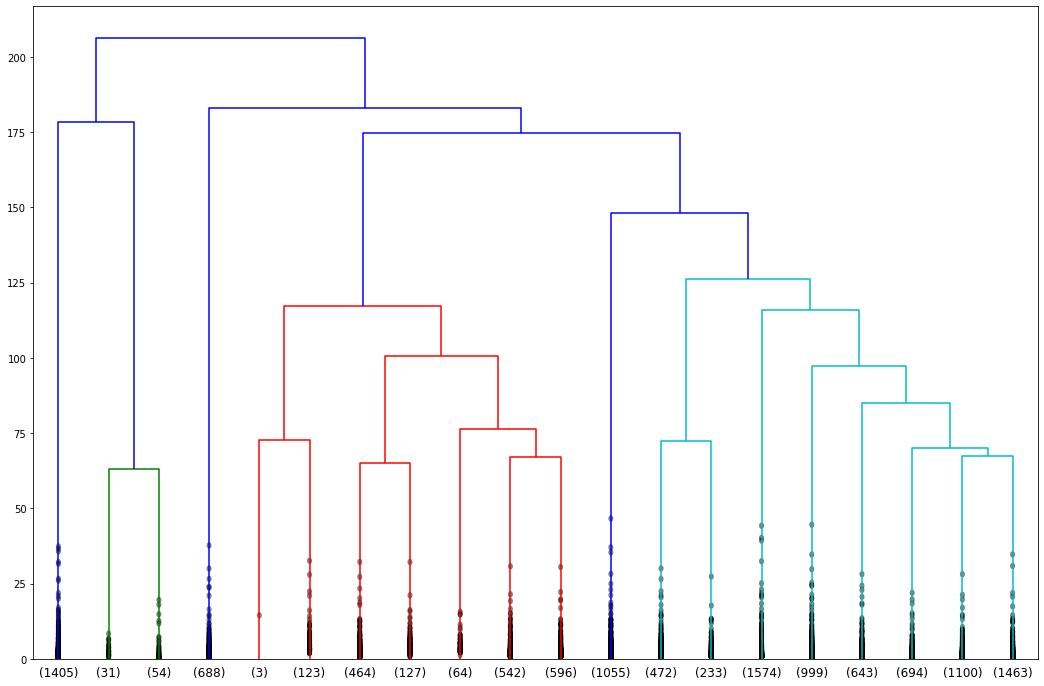

In [85]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(18, 12))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True)

From this linkage function, based on our testing, the parameter for 'ward' estimation gives us the best performance of it. Theoritical, Ward is based on ANOVA, and if the clustering is reasonable, the value should be small enough. Generally, Ward method is better than these of centroid, median or average method. 

Based on this Dendogram, it is clear we can have two to three clusters.Based on our prior knowledge of what the target variable should look like, we still decide it to be 2 clusters.

In [86]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward", #ward minimizes the variance of the clusters being merged.
)
ag.fit(new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

Then we tried to put clustered result into our data frame. 

In [87]:
temp = ag.fit_predict(new)

In [88]:
temp = temp.tolist()

In [89]:
df_r = new.copy()

In [90]:
df_r["Revenue"] = temp

In [91]:
df_r.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2,Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0,0


In [92]:
#plot scatterplot to see how clustering look like
#plt.figure(figsize=(10, 7))
#plt.scatter(X_std, X_std,  cmap='rainbow')#c=new['Revenue'],

###  K-means 

In [93]:
from sklearn.cluster import KMeans
X_std = preprocessing.StandardScaler().fit_transform(new)
km = KMeans(2, random_state=42)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'elbow plot')

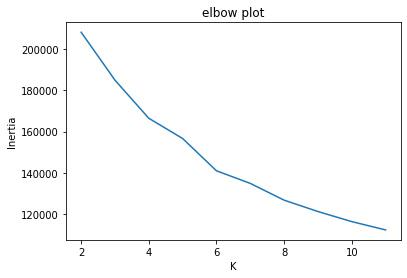

In [94]:
#elbow plot
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
plt.title('elbow plot')

When we checked the slope of the plot, it is obvious that there is an elbow around k=4, which means that less clusters than that 
would be bad. K=4 is a pretty good choice.

Text(0.5, 1.0, 'silhouette plot')

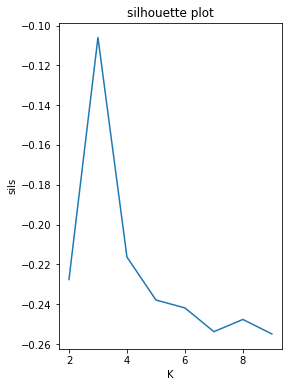

In [95]:

#silhouette plot
from sklearn import metrics
sils = []
sizes = range(2, 10)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    sils.append(metrics.silhouette_score(new, k2.labels_))


fig, ax = plt.subplots(figsize=(4, 6))
pd.Series(sils, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("sils")
plt.title('silhouette plot')

From silhouette plots, it is much clear that around two and three is a good choice. K=3 is a better choice if only checked from this graph.

When we compared outputs from both plots and combine both insights. K=3 seems to be one optimal value for choice. 

Based on project requirement, we apply a K-means clustering algorithm to the data set using a value of K=2. 

In [96]:
#k-means clustering
km = KMeans(n_clusters=2)
km.fit(X_std)
labels = km.predict(X_std)
new.assign(cluster=labels).groupby("cluster").agg(["mean", "var"]).T


cluster                                  0              1
Administrative          mean  2.283954e+00       2.500281
                        var   1.171254e+01       6.975675
Administrative_Duration mean  7.918364e+01      90.515397
                        var   3.197665e+04   26851.854011
Informational           mean  5.335039e-01       0.326026
                        var   1.731745e+00       0.874525
Informational_Duration  mean  3.710199e+01      18.876641
                        var   2.187298e+04    7298.280652
ProductRelated          mean  3.408246e+01      17.788083
                        var   2.212181e+03     362.727282
ProductRelated_Duration mean  1.289421e+03     633.240447
                        var   4.110530e+06  634894.903155
BounceRates             mean  2.477779e-02       0.006852
                        var   2.532623e-03       0.001000
ExitRates               mean  4.650461e-02       0.022719
                        var   2.491559e-03       0.001108
PageValues              mean  5.006176e+00      11.126695
                        var   2.378551e+02     947.400445
SpecialDay              mean  6.854327e-02       0.019224
                        var   4.371085e-02       0.012926
Month                   mean  7.495877e+00       8.577853
                        var   1.146214e+01      10.807631
OperatingSystems        mean  2.109658e+00       2.209106
                        var   6.693958e-01       1.778522
Browser                 mean  2.315610e+00       2.603148
                        var   2.491281e+00       5.596076
Region                  mean  3.097242e+00       3.444632
                        var   5.518695e+00       7.144711
TrafficType             mean  4.026253e+00       4.326588
                        var   1.606462e+01      16.948961
Weekend                 mean  7.742394e-01       0.726813
                        var   1.748093e-01       0.198668
Visitor_0               mean  0.000000e+00       0.952220
                        var   0.000000e+00       0.045522
Visitor_1               mean  0.000000e+00       0.047780
                        var   0.000000e+00       0.045522
Visitor_2               mean  1.000000e+00       0.000000
                        var   0.000000e+00       0.000000

Similarly, we also put the clustered result of Kmeans into the data frame. 

In [97]:
temp2 =  labels.tolist()
df_r["Revenue2"] = temp2
df_r.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2,Revenue,Revenue2
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0,0,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0,0,1
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0,0,0


## Clustering Output vs. Actual Labels

In [98]:
# check and read the dataset from github
label = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/Project2_Data_Labels.csv')
label.rename(columns={"Revenue": "V_Revenue"},inplace=True)

In [99]:
data = pd.concat([df_r, label],axis=1)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2,Revenue,Revenue2,V_Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0,0,1,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0,0,0,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0,0,1,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0,0,0,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0,0,0,False


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [101]:
#hierarchical
print(data['Revenue'].value_counts())
#k-means
print(data['Revenue2'].value_counts())
#label
print(data['V_Revenue'].value_counts())

0    12007
1      323
Name: Revenue, dtype: int64
0    10551
1     1779
Name: Revenue2, dtype: int64
False    10422
True      1908
Name: V_Revenue, dtype: int64


From this plotted result, we can see k means has an opposite result compared to hierarchical clustering. We know this clustering process does not make judgement on the label, So it is acceptable to get an opposite result.  

Although it is not required in the tasks, we really want to try how different these two different clustering methods are. We now check false positives and false negatives as well. 

In [102]:
data['V_Revenue'].replace({False: 0, True: 1}, inplace=True)

In [103]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2,Revenue,Revenue2,V_Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0,0,1,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0,0,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0,0,1,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0,0,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0,0,0,0


In [104]:
revenue_result=data.copy()

In [105]:
# we want to compare label generated by hierarchy cluster and actual label
revenue_result['result'] = np.where(revenue_result['Revenue'] == revenue_result['V_Revenue'], 'match', 'not match')
print(revenue_result)

       Administrative  Administrative_Duration  ...  V_Revenue     result
0                   0                     0.00  ...          1  not match
1                   0                     0.00  ...          0      match
2                   4                    37.50  ...          0      match
3                   4                   115.70  ...          0      match
4                   1                    60.00  ...          0      match
...               ...                      ...  ...        ...        ...
12325               3                   148.00  ...          0      match
12326               1                     9.00  ...          0      match
12327               0                     0.00  ...          0      match
12328               0                     0.00  ...          0      match
12329               1                    73.75  ...          0      match

[12330 rows x 23 columns]


In [106]:
print(revenue_result['result'].value_counts())

match        10323
not match     2007
Name: result, dtype: int64


We can see hierarchy clustering actually only predicts roughly 85%(10323/(10323+2007)) of label correctly.

As discussed before, Kmeans will get a reversed result. So we this time switch order of match and not match to get the correct result.

In [107]:
#we want to compare label generated by k means cluster and actual label
#we reverse label a bit to get correct label
revenue_result['result2'] = np.where(revenue_result['Revenue2'] == revenue_result['V_Revenue'], 'not match', 'match')
print (revenue_result['result2'].value_counts())

not match    9519
match        2811
Name: result2, dtype: int64


Now we see the actual preformance of k-means is not quite good, although total number of positive and negative is closer to the true label, it does not report exact label correctly. On the other hand, it made a lot of false positives and false negatives. 
However, this clustering method is still better than half-half guess if we balanced the revenue attributes. 

Also, through this process, we will have to apply SMOTE later on modeling. 

Based on comparision, we decided to use Kmeans clustering instead of hierach clustering 

For better modeling,we clear up data set to create new copy and only leave appropriate term for modeling. 

In [108]:
SVM_train= data.copy()
SVM_train.drop(columns = 'Revenue',inplace=True)
SVM_train.drop(columns = 'V_Revenue',inplace=True)

In [109]:
SVM_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Visitor_0,Visitor_1,Visitor_2,Revenue2
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,0,1.0,0.0,0.0,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,1,0.0,0.0,1.0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,1.0,0.0,0.0,1
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,1,0.0,0.0,1.0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,1,0.0,0.0,1.0,0


As table showed, we now only leave the term of label by clustering method 

Based on the clustering work we did, we knew the data set is not well balanced. To check the real performance of the model. We also need to apply SMOTE technique into our desired variable. 

## SVM Modeling & Select Models

__model 1__ Select features from EDA.

Based on our EDA findings, we decide to use these explantory variables for building up the model. The selected attributes are Administrative,BounceRates,Browser, Region, Exit Rate, Traffic Type, Month,weekend, Administritive_Duration, and SpecialDay.

We use SMOTE to make the sample to be balanced to get our result. When we tested with different kernels, linear kernel is incapable for running in this case. We assume the time complexity becomes infinite in this case. So we decided to avoid using linear kernel for all models.

In [110]:
from sklearn.model_selection import train_test_split
#apply smote
from imblearn.over_sampling import SMOTE
predictors1 = ['Administrative', 'BounceRates', 'Browser', 'Region', 'ExitRates', 'TrafficType', 'Month', 'Weekend', 'Administrative_Duration', 'SpecialDay']

X = SVM_train[predictors1]
y = data.Revenue2

#Try to use SMOTE to resample 
X, y  = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=22)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [111]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier

svclassifier = SVC(kernel='poly')
svclassifier.fit(X,y)

#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 228 8264]
 [  66 8324]]
              precision    recall  f1-score   support

           0       0.78      0.03      0.05      8492
           1       0.50      0.99      0.67      8390

    accuracy                           0.51     16882
   macro avg       0.64      0.51      0.36     16882
weighted avg       0.64      0.51      0.36     16882



In [112]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train,  y_train)

#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5353 3139]
 [3482 4908]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      8492
           1       0.61      0.58      0.60      8390

    accuracy                           0.61     16882
   macro avg       0.61      0.61      0.61     16882
weighted avg       0.61      0.61      0.61     16882



For model 1, we also compared both two kernels, rbf and poly. Overall, rbf performs better on a balanced scores. We later only compared rbf kernel model. 

__Model 2__ Using bidirectional selection method.

For the model 2, we use bidirectional selection to select the features. 

In [113]:
# Feature selection -- Bidirectional
import statsmodels.api as sm
import statsmodels.formula.api as smf

#define a function to perform bidirectional selection
def stepwise(data, target,SL_in=0.05,SL_out = 0.05):
    '''This function takes a dataset of explanatory variables and a target variable and performs bidirectional
    selection to return the best features for a model.'''
    original = data.columns.tolist()
    best_features = []
    while (len(original)>0):
        remaining_features = list(set(original)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [114]:
#apply the function
features =stepwise(new, label)
#print 
features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


['PageValues',
 'ProductRelated',
 'ExitRates',
 'Month',
 'Visitor_0',
 'ProductRelated_Duration',
 'BounceRates',
 'OperatingSystems',
 'SpecialDay']

After getting these feature, we now set up model.

In [115]:
#model 2
from sklearn.model_selection import train_test_split


predictors2 = ['PageValues', 'ProductRelated', 'ExitRates', 'Month','Visitor_0','ProductRelated_Duration', 'BounceRates', 'OperatingSystems', 'SpecialDay']
X = SVM_train[predictors2]
y2 = data.Revenue2

#Try to use SMOTE to resample 

X2, y2  = SMOTE().fit_resample(X, y2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.8, random_state=22)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
#kernel='linear'
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = svclassifier.predict(X2_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

[[2830 5662]
 [1232 7158]]
              precision    recall  f1-score   support

           0       0.70      0.33      0.45      8492
           1       0.56      0.85      0.67      8390

    accuracy                           0.59     16882
   macro avg       0.63      0.59      0.56     16882
weighted avg       0.63      0.59      0.56     16882



Model 2 has a better precision. 

__model 3__ Using RandomForestClassifier to find better features

For this model, according to some online tutorial,  we used randomforest to rank the importance.
Based on the selected attributes, we built model3. 
We used parameter thresholds of 0.01 to optimize the attributes. In one word, we only use values of more than 0.01. 
In this model, we picked pagevalues,month, ExitRates,and Producrt related.

In [ ]:

#install the required package
!pip install shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


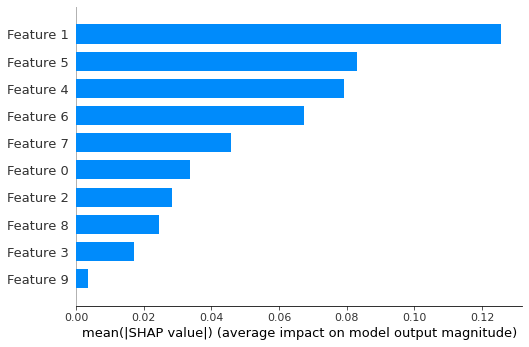

In [120]:

# import shap
import shap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type = 'bar')


In [121]:
#model 3
from sklearn.model_selection import train_test_split


predictors3 = ['PageValues', 'ProductRelated', 'ExitRates', 'Month']
X = SVM_train[predictors3]
y3 = data.Revenue2

#Try to use SMOTE to resample 

X3, y3  = SMOTE().fit_resample(X, y3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.8, random_state=22)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [122]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
#kernel='linear'
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X3_train, y3_train)

#Predict the response for test dataset
y3_pred = svclassifier.predict(X3_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y3_test,y3_pred))
print(classification_report(y3_test,y3_pred))

[[5688 2804]
 [2961 5429]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      8492
           1       0.66      0.65      0.65      8390

    accuracy                           0.66     16882
   macro avg       0.66      0.66      0.66     16882
weighted avg       0.66      0.66      0.66     16882



Among these three model, model 3 gave the best result.

## Clustering + SVM Output vs. Actual Labels

In [123]:
mix = {'value type': ['0','0','0','1','1','1'],
             'matrics': ["precision",'recall','f1-score',"precision",'recall','f1-score'],
            'model1': ['0.61','0.59','0.60','0.61','0.62','0.61'],
            'model2': ['0.56','0.84','0.67','0.69','0.34','0.45'],
             'model3': ['0.66','0.64','0.65','0.66','0.67','0.66']             
            }

df = pd.DataFrame(mix, columns= ['value type','matrics','model1','model2','model3'])

pivot = df.pivot_table(index=['matrics','value type'], values=['model1','model2','model3'], aggfunc='sum')
print (pivot)

                     model1 model2 model3
matrics   value type                     
f1-score  0            0.60   0.67   0.65
          1            0.61   0.45   0.66
precision 0            0.61   0.56   0.66
          1            0.61   0.69   0.66
recall    0            0.59   0.84   0.64
          1            0.62   0.34   0.67


Based on the performance of different model with kernel. We found rbf kernel give the best performance. 
Among our models, the model two and model three has closer performance based on precision, recall and f1score. Since model 3 has less feature, with a higher scores, we think it is a more efficient model.

## Conclusions

Based on our modeling, model 3 gave the best result. Although it is not very ideal, we can get 66% of precision on a balanced dataset. It still performs better than random guess of 50% in a balanced data. 

## References

1. https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
2. https://www.kaggle.com/roshansharma/online-shopper-s-intention
3. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html